In [ ]:
!pip install -U --pre tensorflow=="2.*"
!pip install tf_slim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 92.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13

In [ ]:
!pip install pycocotools

In [ ]:
!pip uninstall Cython -y

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2


In [ ]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

In [ ]:
%%bash
cd models/research
cp object_detection/packages/tf2/setup.py .
pip install .

Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 109.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [ ]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [ ]:
model_name = 'ssd_mobilenet_v1_coco_2017_11_17'

#model_name = 'mask_rcnn_inception_resnet_v2_1024x1024_coco17_gpu-8'

#model_name = 'centernet_resnet50_v2_512x512_coco17_tpu-8'

In [ ]:
base_url = 'http://download.tensorflow.org/models/object_detection/'

#base_url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/'

In [ ]:
model_file = model_name + ".tar.gz"
model_file

'ssd_mobilenet_v1_coco_2017_11_17.tar.gz'

In [ ]:
cd pre_trained_model/

/content/pre_trained_model


In [ ]:
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2023-09-22 15:13:19--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.2.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M  40.8MB/s    in 4.5s    

2023-09-22 15:13:23 (82.1 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]



In [ ]:
#!pwd

/content/pre_trained_model


In [ ]:
#!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
model_dir = tf.keras.utils.get_file(
    fname = model_name,
    origin = base_url + model_file,
    untar = True
)

model_dir

76534733/76534733 [==============================] - 1s 0us/step


'/root/.keras/datasets/ssd_mobilenet_v1_coco_2017_11_17'

In [ ]:
model_dir = pathlib.Path(model_dir)/"saved_model"
model_dir

PosixPath('/root/.keras/datasets/ssd_mobilenet_v1_coco_2017_11_17/saved_model')

In [ ]:
str(model_dir)

'/root/.keras/datasets/ssd_mobilenet_v1_coco_2017_11_17/saved_model'

In [ ]:
model = tf.saved_model.load(str(model_dir))
model

In [ ]:
PATH_TO_LABELS = 'models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS)
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [ ]:
PATH_TO_TEST_IAMGES_DIR = pathlib.Path('models/research/object_detection/test_images')
PATH_TO_TEST_IAMGES_DIR

PosixPath('models/research/object_detection/test_images')

In [ ]:
PATHS = sorted(list(PATH_TO_TEST_IAMGES_DIR.glob("*.jpg")))
PATHS

[PosixPath('models/research/object_detection/test_images/image1.jpg'),
 PosixPath('models/research/object_detection/test_images/image2.jpg'),
 PosixPath('models/research/object_detection/test_images/image3.jpg')]

In [ ]:
model.signatures['serving_default'].inputs

[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]

In [ ]:
model.signatures['serving_default'].outputs

[<tf.Tensor 'detection_boxes:0' shape=(None, 100, 4) dtype=float32>,
 <tf.Tensor 'detection_classes:0' shape=(None, 100) dtype=float32>,
 <tf.Tensor 'detection_scores:0' shape=(None, 100) dtype=float32>,
 <tf.Tensor 'num_detections:0' shape=(None,) dtype=float32>]

In [ ]:
model.signatures['serving_default'].output_dtypes

{'detection_scores': tf.float32,
 'detection_classes': tf.float32,
 'detection_boxes': tf.float32,
 'num_detections': tf.float32}

In [ ]:
model.signatures['serving_default'].output_shapes

{'detection_scores': TensorShape([None, 100]),
 'detection_classes': TensorShape([None, 100]),
 'detection_boxes': TensorShape([None, 100, 4]),
 'num_detections': TensorShape([None])}

In [ ]:
image_np = np.array(Image.open(PATHS[0]))
image_np.shape

(636, 1024, 3)

In [ ]:
type(image_np)

numpy.ndarray

In [ ]:
image = np.asarray(image_np)

In [ ]:
input_tensor =tf.convert_to_tensor(image)
type(input_tensor)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
input_tensor.shape

TensorShape([636, 1024, 3])

In [ ]:
input_tensor

<tf.Tensor: shape=(636, 1024, 3), dtype=uint8, numpy=
array([[[ 53,  39,  26],
        [ 40,  26,  15],
        [ 27,  13,   4],
        ...,
        [233, 221, 199],
        [234, 222, 200],
        [234, 222, 200]],

       [[ 52,  38,  27],
        [ 41,  27,  16],
        [ 31,  17,   8],
        ...,
        [231, 219, 197],
        [231, 219, 197],
        [231, 219, 197]],

       [[ 49,  37,  25],
        [ 43,  29,  20],
        [ 38,  24,  15],
        ...,
        [228, 216, 194],
        [228, 216, 194],
        [228, 216, 194]],

       ...,

       [[ 66,  65,  79],
        [ 64,  63,  77],
        [ 64,  63,  77],
        ...,
        [100, 102, 123],
        [ 92,  96, 121],
        [ 91,  97, 123]],

       [[ 72,  72,  82],
        [ 71,  71,  81],
        [ 68,  68,  78],
        ...,
        [101, 103, 124],
        [ 97, 101, 126],
        [102, 108, 134]],

       [[ 77,  78,  83],
        [ 78,  79,  84],
        [ 75,  76,  81],
        ...,
        [ 98, 100, 1

In [ ]:
input_tensor = input_tensor[tf.newaxis, ...]
input_tensor.shape

TensorShape([1, 636, 1024, 3])

In [ ]:
input_tensor

<tf.Tensor: shape=(1, 636, 1024, 3), dtype=uint8, numpy=
array([[[[ 53,  39,  26],
         [ 40,  26,  15],
         [ 27,  13,   4],
         ...,
         [233, 221, 199],
         [234, 222, 200],
         [234, 222, 200]],

        [[ 52,  38,  27],
         [ 41,  27,  16],
         [ 31,  17,   8],
         ...,
         [231, 219, 197],
         [231, 219, 197],
         [231, 219, 197]],

        [[ 49,  37,  25],
         [ 43,  29,  20],
         [ 38,  24,  15],
         ...,
         [228, 216, 194],
         [228, 216, 194],
         [228, 216, 194]],

        ...,

        [[ 66,  65,  79],
         [ 64,  63,  77],
         [ 64,  63,  77],
         ...,
         [100, 102, 123],
         [ 92,  96, 121],
         [ 91,  97, 123]],

        [[ 72,  72,  82],
         [ 71,  71,  81],
         [ 68,  68,  78],
         ...,
         [101, 103, 124],
         [ 97, 101, 126],
         [102, 108, 134]],

        [[ 77,  78,  83],
         [ 78,  79,  84],
         [ 75,  7

In [ ]:
model_fn = model.signatures['serving_default']

In [ ]:
output_dict = model_fn(input_tensor)

In [ ]:
output_dict

{'detection_scores': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
 array([[0.9406898 , 0.9345037 , 0.23088393, 0.22518334, 0.17250304,
         0.13962   , 0.13212584, 0.09975878, 0.08992782, 0.0888859 ,
         0.08091614, 0.07895163, 0.07818405, 0.07565786, 0.0733128 ,
         0.07074984, 0.06597457, 0.06404572, 0.0638807 , 0.06381202,
         0.06380299, 0.0605021 , 0.05898411, 0.05898105, 0.05761264,
         0.05641435, 0.05638987, 0.05499976, 0.05495749, 0.05426126,
         0.05425427, 0.05409577, 0.05335928, 0.05279091, 0.05228688,
         0.05219527, 0.05164091, 0.05065925, 0.05030258, 0.04837715,
         0.0482281 , 0.0472066 , 0.04674381, 0.04671814, 0.04644427,
         0.04614153, 0.04420149, 0.04286435, 0.04251302, 0.04174395,
         0.0416657 , 0.04137363, 0.04096063, 0.04053542, 0.03991389,
         0.03988716, 0.03984395, 0.03930983, 0.03923906, 0.03877998,
         0.03877515, 0.03852981, 0.03816197, 0.03816035, 0.03742356,
         0.03689953, 0.03677789,

In [ ]:
num_detections = int(output_dict.pop('num_detections'))
num_detections

100

In [ ]:
output_dict

{'detection_scores': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
 array([[0.9406898 , 0.9345037 , 0.23088393, 0.22518334, 0.17250304,
         0.13962   , 0.13212584, 0.09975878, 0.08992782, 0.0888859 ,
         0.08091614, 0.07895163, 0.07818405, 0.07565786, 0.0733128 ,
         0.07074984, 0.06597457, 0.06404572, 0.0638807 , 0.06381202,
         0.06380299, 0.0605021 , 0.05898411, 0.05898105, 0.05761264,
         0.05641435, 0.05638987, 0.05499976, 0.05495749, 0.05426126,
         0.05425427, 0.05409577, 0.05335928, 0.05279091, 0.05228688,
         0.05219527, 0.05164091, 0.05065925, 0.05030258, 0.04837715,
         0.0482281 , 0.0472066 , 0.04674381, 0.04671814, 0.04644427,
         0.04614153, 0.04420149, 0.04286435, 0.04251302, 0.04174395,
         0.0416657 , 0.04137363, 0.04096063, 0.04053542, 0.03991389,
         0.03988716, 0.03984395, 0.03930983, 0.03923906, 0.03877998,
         0.03877515, 0.03852981, 0.03816197, 0.03816035, 0.03742356,
         0.03689953, 0.03677789,

In [ ]:
for key, value in output_dict.items():
  print(key, value.shape)

detection_scores (1, 100)
detection_classes (1, 100)
detection_boxes (1, 100, 4)


In [ ]:
output_dict = {key: output_dict[key] for key in output_dict.keys()
       & {'detection_boxes', 'detection_classes', 'detection_scores', 'detection_masks'}}

output_dict

{'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[3.90827954e-02, 1.92147940e-02, 8.72103572e-01, 3.15773666e-01],
         [1.09514862e-01, 4.02835965e-01, 9.24646258e-01, 9.73048210e-01],
         [5.07123888e-01, 3.85651380e-01, 8.76479685e-01, 7.03940988e-01],
         [6.38732016e-02, 2.81165689e-01, 9.16385055e-01, 8.24096322e-01],
         [2.15275764e-01, 3.96741509e-01, 9.12903666e-01, 6.79073811e-01],
         [5.27002692e-01, 3.72713029e-01, 8.83502722e-01, 6.94296658e-01],
         [0.00000000e+00, 5.25425732e-01, 2.53364533e-01, 7.16124356e-01],
         [7.37795532e-02, 2.98961937e-01, 9.20517564e-01, 9.38026488e-01],
         [5.31044126e-01, 3.84129971e-01, 9.15436506e-01, 8.53949547e-01],
         [1.45327717e-01, 3.87902319e-01, 9.06316519e-01, 9.78849232e-01],
         [2.08421141e-01, 2.78769493e-01, 8.26954961e-01, 6.09079540e-01],
         [3.48855168e-01, 3.05225730e-01, 8.99385095e-01, 7.33767033e-01],
         [7.35014677e-03, 5

In [ ]:
for key, value in output_dict.items():
  print(key, value.shape)

detection_boxes (1, 100, 4)
detection_classes (1, 100)
detection_scores (1, 100)


In [ ]:
num_detections

100

In [ ]:
output_dict = {key:value[0, :num_detections].numpy()
                for key, value in output_dict.items()}
output_dict['num_detections'] = num_detections

In [ ]:
output_dict['num_detections']

100

In [ ]:
output_dict

{'detection_boxes': array([[3.90827954e-02, 1.92147940e-02, 8.72103572e-01, 3.15773666e-01],
        [1.09514862e-01, 4.02835965e-01, 9.24646258e-01, 9.73048210e-01],
        [5.07123888e-01, 3.85651380e-01, 8.76479685e-01, 7.03940988e-01],
        [6.38732016e-02, 2.81165689e-01, 9.16385055e-01, 8.24096322e-01],
        [2.15275764e-01, 3.96741509e-01, 9.12903666e-01, 6.79073811e-01],
        [5.27002692e-01, 3.72713029e-01, 8.83502722e-01, 6.94296658e-01],
        [0.00000000e+00, 5.25425732e-01, 2.53364533e-01, 7.16124356e-01],
        [7.37795532e-02, 2.98961937e-01, 9.20517564e-01, 9.38026488e-01],
        [5.31044126e-01, 3.84129971e-01, 9.15436506e-01, 8.53949547e-01],
        [1.45327717e-01, 3.87902319e-01, 9.06316519e-01, 9.78849232e-01],
        [2.08421141e-01, 2.78769493e-01, 8.26954961e-01, 6.09079540e-01],
        [3.48855168e-01, 3.05225730e-01, 8.99385095e-01, 7.33767033e-01],
        [7.35014677e-03, 5.13657928e-02, 6.02021396e-01, 8.20262849e-01],
        [7.01456964

In [ ]:
output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

In [ ]:
output_dict['detection_classes']

array([18, 18, 18, 18, 18, 33,  1, 63, 18, 21,  3, 18,  1, 18, 21, 18, 62,
       18, 18, 62,  1, 62, 18,  3,  1, 21,  1,  1,  1,  1,  1, 18,  1,  1,
        1,  1, 62,  1,  1,  1,  1,  1, 62, 18,  1, 63,  1,  1, 84,  1,  1,
       18,  1,  1, 62, 21, 57, 18, 18, 62, 18,  1,  1,  1,  1,  1,  1,  1,
       18, 62,  1, 88, 47,  1, 47, 62, 84,  1, 18,  1,  1,  1,  1, 84, 18,
       62, 18, 21,  1, 62, 62,  1, 18, 21,  1, 18, 47,  1,  1, 47])

In [ ]:
#type(output_dict["detection_masks"])

In [ ]:
#mask_image = np.zeros_like(input_tensor[0])

In [ ]:
for i in range(masks.shape[-1]):
    if class_ids[i] == 1:  # You can change the class ID as needed
        mask = masks[:, :, i]
        mask = cv2.resize(mask, (input_image.shape[2], input_image.shape[1]))
        mask_image = np.where(mask[:, :, np.newaxis] > 0.5, (0, 255, 0), mask_image)

In [ ]:
# def reframe_box_masks_to_image_masks_default():
#     """The default function when there are more than 0 box masks."""

#     num_boxes = tf.shape(box_masks)[0]
#     box_masks_expanded = tf.expand_dims(box_masks, axis=3)

#     resized_crops = tf.image.crop_and_resize(
#         image=box_masks_expanded,
#         boxes=reframe_image_corners_relative_to_boxes(boxes),
#         box_indices=tf.range(num_boxes),
#         crop_size=[image_height, image_width],
#         method=resize_method,
#         extrapolation_value=0)
#     return tf.cast(resized_crops, box_masks.dtype)

In [ ]:
#detection_masks_reframed = reframe_box_masks_to_image_masks(output_dict['detection_masks'], output_dict['detection_boxes']/256.0, image_np.shape[0], image_np.shape[1])

In [ ]:
# detection_masks_reframed = tf.cast(
#     detection_masks_reframed > min_score_thresh,
#     np.uint8)

In [ ]:
# vis_util.visualize_boxes_and_labels_on_image_array(
#     image_np,
#     output_dict['detection_boxes'],
#     output_dict['detection_classes'],
#     output_dict['detection_scores'],
#     category_index,
#     instance_masks=output_dict.get('detection_masks_reframed', None),
#     use_normalized_coordinates=True,
#     line_thickness=8
# )
# display(Image.fromarray(image_np))

In [ ]:
# vis_util.visualize_boxes_and_labels_on_image_array(
#     image_np,
#     np.zeros((0,), dtype=np.int32),  # Provide an empty list for boxes
#     np.zeros((0,), dtype=np.int32),  # Provide an empty list for classes
#     np.zeros((0,), dtype=np.float32),
#     category_index,
#     instance_masks=output_dict.get('detection_masks', None),
#     use_normalized_coordinates=True,
#     line_thickness=8
# )
# display(Image.fromarray(image_np))

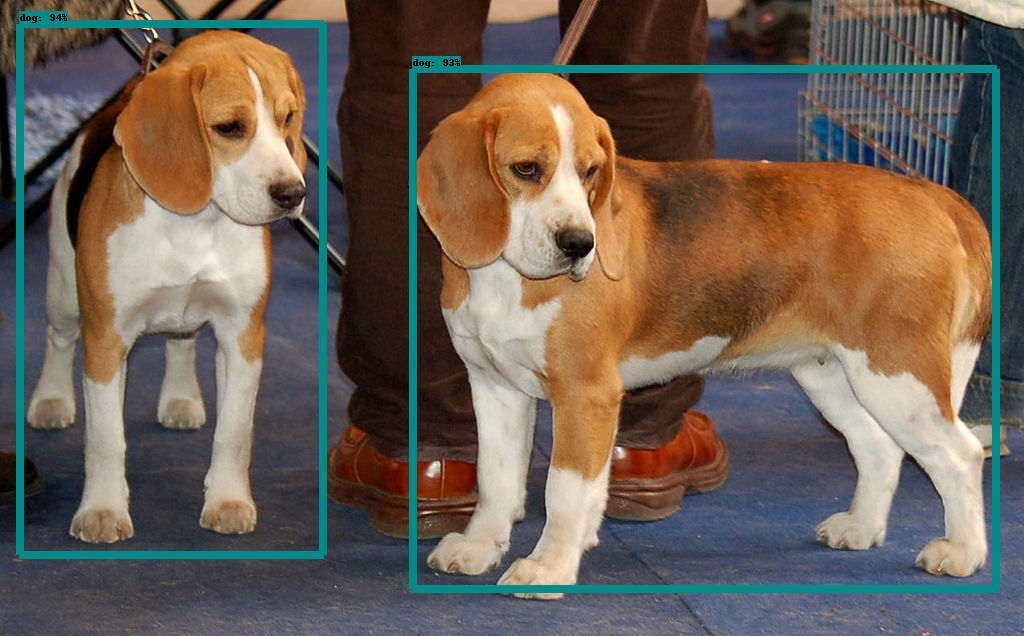

In [ ]:
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8
)
display(Image.fromarray(image_np))

In [ ]:
output_dict['detection_boxes']

array([[1.01077050e-01, 3.86821002e-01, 9.40797031e-01, 9.81279850e-01],
       [2.92769615e-02, 2.63521671e-02, 8.61321211e-01, 3.09906423e-01],
       [0.00000000e+00, 5.38037598e-01, 2.57813692e-01, 7.04667509e-01],
       [0.00000000e+00, 2.03290656e-01, 8.44182193e-01, 6.32741630e-01],
       [0.00000000e+00, 9.83270109e-02, 8.42713535e-01, 7.84657001e-01],
       [0.00000000e+00, 4.46589589e-02, 8.72789741e-01, 7.13934124e-01],
       [1.24708451e-02, 1.44346952e-02, 9.58467662e-01, 9.77753520e-01],
       [6.27385732e-03, 1.56385601e-02, 9.37877297e-01, 8.68322849e-01],
       [0.00000000e+00, 2.33995914e-02, 8.69016826e-01, 9.39101279e-01],
       [3.58437574e-05, 1.62874162e-02, 8.69738102e-01, 6.78797841e-01],
       [4.44274861e-03, 6.95898533e-01, 1.02243356e-01, 7.94701934e-01],
       [3.92533839e-03, 6.90456808e-01, 1.02575645e-01, 7.87522376e-01],
       [6.23147823e-02, 1.59786344e-02, 9.78505731e-01, 9.76403296e-01],
       [3.92533839e-03, 6.90456808e-01, 1.02575645e

In [ ]:
output_dict['detection_classes']

array([18, 18,  1,  1,  1,  1,  1,  1,  1,  1,  1, 18, 15,  3, 15, 21,  4,
       15,  4, 18, 18,  1,  1, 22, 27,  1, 27, 27, 27, 88, 21,  3, 17, 21,
       21, 44, 88, 37, 15, 31,  4, 19, 31, 18, 27,  3, 21,  1,  1, 31, 16,
       21, 63,  1, 19,  4, 21, 15, 40,  1, 65, 19, 31,  1, 15, 31, 31, 31,
       15, 32, 44, 15, 34, 19, 15, 63, 31, 31, 33,  1, 63, 27, 62, 18, 75,
       16, 22,  8, 19, 27, 15, 17, 63,  1, 18,  3, 22, 63, 75, 62])

In [ ]:
output_dict['detection_scores']

array([0.9556623 , 0.90543705, 0.4978529 , 0.27445883, 0.26778322,
       0.22983591, 0.22762197, 0.22716531, 0.21067064, 0.20385084,
       0.18778403, 0.17390345, 0.16158214, 0.15600236, 0.1496291 ,
       0.14049895, 0.13852458, 0.12383092, 0.11552303, 0.11467148,
       0.1127805 , 0.11238448, 0.11136523, 0.10903921, 0.10631074,
       0.10612482, 0.10230493, 0.09653808, 0.09525422, 0.09360263,
       0.09052883, 0.08869915, 0.08658693, 0.08579803, 0.08523531,
       0.08505917, 0.08380333, 0.08315549, 0.0800973 , 0.07954682,
       0.07527929, 0.07446073, 0.07373508, 0.07370599, 0.07281832,
       0.07242052, 0.07152145, 0.07077153, 0.07067735, 0.07044198,
       0.07036236, 0.07019757, 0.06863923, 0.06857335, 0.06829435,
       0.06774059, 0.06618492, 0.065565  , 0.06485339, 0.06442315,
       0.0644096 , 0.06402624, 0.06389821, 0.06375203, 0.06365377,
       0.06340406, 0.0629946 , 0.06289398, 0.06262569, 0.06257235,
       0.06219846, 0.06195219, 0.06147158, 0.05959668, 0.05953